<h1> San Fransisco Salaries </h1>
<ul>
    <li> Import Libraries </li>
    <li> Read Data </li>
    <li> Quick Explore </li>
    <li> Data Preprocessing </li>
    <li> Summary Statistics </li>
    <li> Exploratory Data Analysis </li>
</ul>

### Import Libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

### Read Data

In [52]:
df = pd.read_csv("Salaries.csv")
df.head()

C:\Users\Blu-Ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Quick Explore 

In [53]:
df.shape

(148654, 13)

In [54]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


### Data Preprocessing

#### Missing Values

In [156]:
df.isna().sum().sort_values(ascending=False)

Notes               148654
Status              110535
Benefits             36159
BasePay                605
Id                       0
EmployeeName             0
JobTitle                 0
OvertimePay              0
OtherPay                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
len_titles               0
dtype: int64

<AxesSubplot:>

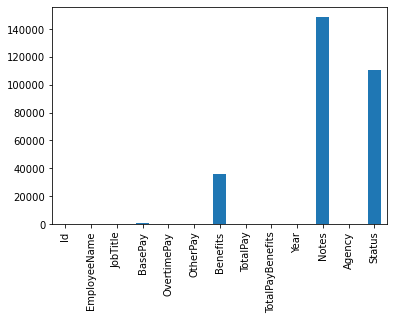

In [56]:
df.isna().sum().plot(kind='bar')

#### Handling Data Types

In [57]:
df['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., '6.04', '15.50',
       'Not Provided'], dtype=object)

In [157]:
df['BasePay'].replace("Not Provided", 0 ,inplace = True)
df['BasePay'] = df['BasePay'].astype(float)

In [158]:
df['OvertimePay'].unique()
df['OvertimePay'].replace("Not Provided", 0 , inplace = True)
df['OvertimePay'] = df['OvertimePay'].astype(float)

In [160]:
df['OtherPay'].unique()
df['OtherPay'].replace("Not Provided" , 0 , inplace = True)
df['OtherPay'] = df['OtherPay'].astype(float)

In [161]:
df['Benefits'].unique()
df['Benefits'].replace("Not Provided" , 0 , inplace=True)
df['Benefits'] = df['Benefits'].astype(float)

In [162]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
len_titles            int64
dtype: object

### Summary Statistics 

In [63]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148049.000000,148654.000000,148654.000000,112495.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,66323.656854,5065.923568,3648.669115,25007.003942,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,42765.447379,11454.256594,8056.515703,15402.663885,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,33583.520000,0.000000,0.000000,11527.730000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,65006.930000,0.000000,811.170000,28627.780000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,94691.050000,4657.632500,4235.907500,35566.730000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


### Exploratory Data Analysis

<h5> QUESTIONS </h5>
<ul>
    <li> What Is The Mean Of Base Pay </li>
    <li> What is the highest and lowest Overtimepay in the data set </li>
    <li> What is the jop title of JOSEPH DRISCOLL </li>
    <li> How much joseph make(including benefits) </li>
    <li> What is the name of the lowest and highest paid person for BasePay and total pay </li>
    <li> What is the average BasePay for all employees per year </li>
    <li> How Many unique job titles are there </li>
    <li> What are the top 10 most common jobs In The Data Set </li>
    <li> Is The highest paid person in 2011 is The highest in 2012 </li>
    <li> What are the top 10 jobs most required in 2011 , 2012 </li>
    <li> Who are the highest paid peaple in 2013 , 2014 </li>
    <li> What is the average salary for each job </li>
    <li> How many job titles were represented by only one person in 2013 </li>
    <li> How Many Peaple have The Cheif In Their job title </li>
    <li> Is there a correlation between length of the job title and salary </li>
</ul>

##### What Is The Mean Of Base Pay

In [65]:
df["BasePay"].mean()

66323.65685410085

##### What is the highest and lowest Overtimepay in the data set

In [66]:
df['OvertimePay'].max()

245131.88

In [67]:
df['OvertimePay'].min()

-0.01

##### What is the jop title of JOSEPH DRISCOLL

In [68]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

##### How much joseph make(including benefits)

In [69]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

##### what is the name of the lowest and highest paid person for BasePay and  total pay

In [120]:
df[df['BasePay'] == df['BasePay'].min()]['EmployeeName']

72832    Irwin Sidharta
Name: EmployeeName, dtype: object

In [121]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

In [122]:
df[df['BasePay'] == df['BasePay'].max()]['EmployeeName']

72925    Gregory P Suhr
Name: EmployeeName, dtype: object

In [123]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

##### What is the average BasePay for all employees per year

In [74]:
df.groupby("Year")['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66557.437750
Name: BasePay, dtype: float64

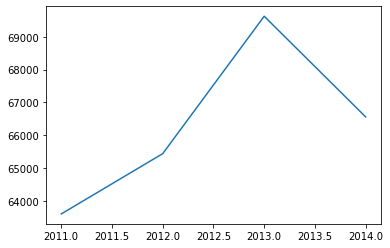

In [77]:
plt.plot(df.groupby("Year")['BasePay'].mean())

##### How Many unique job titles are there

In [82]:
df['JobTitle'].nunique()

2159

##### What are the top 10 most common jobs In The Data Set

In [104]:
df['JobTitle'].value_counts().head(10)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

##### Who is the highest paid person in 2011 and What is his job

In [105]:
df_2011 = df[df['Year'] == 2011]
df_2011[df_2011['TotalPayBenefits']== df_2011['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [106]:
df_2011[df_2011['TotalPayBenefits']== df_2011['TotalPayBenefits'].max()]['JobTitle']

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object

##### Is The highest paid person in 2011 is The highest in 2012 

In [107]:
df_2012 = df[df["Year"] == 2012]
df_2012[df_2012['TotalPayBenefits']== df_2012['TotalPayBenefits'].max()]['EmployeeName']

36159    Gary Altenberg
Name: EmployeeName, dtype: object

In [108]:
df_2012[df_2012['TotalPayBenefits']== df_2012['TotalPayBenefits'].max()]['JobTitle']

36159    Lieutenant, Fire Suppression
Name: JobTitle, dtype: object

##### What are the top 10 jobs most required in 2011 , 2012

In [109]:
df_2011['JobTitle'].value_counts().head(10)

TRANSIT OPERATOR                        2388
SPECIAL NURSE                           1402
REGISTERED NURSE                        1219
CUSTODIAN                                796
FIREFIGHTER                              794
POLICE OFFICER III                       779
RECREATION LEADER                        692
DEPUTY SHERIFF                           685
MENTAL HEALTH REHABILITATION WORKER      559
PUBLIC SERVICE AIDE-SPECIAL PROGRAMS     531
Name: JobTitle, dtype: int64

In [110]:
df_2012['JobTitle'].value_counts().head(10)

Transit Operator                2262
Special Nurse                   1466
Registered Nurse                1271
Police Officer 3                 864
Custodian                        825
Firefighter                      759
Public Svc Aide-Public Works     743
Deputy Sheriff                   663
Recreation Leader                627
Patient Care Assistant           617
Name: JobTitle, dtype: int64

##### Who are the highest paid peaple in 2013 , 2014

In [113]:
df_2013 = df[df["Year"] == 2013]
df_2014 = df[df["Year"] == 2014]

In [115]:
df_2013[ df_2013['TotalPayBenefits'] == df_2013['TotalPayBenefits'].max() ]['EmployeeName']

72925    Gregory P Suhr
Name: EmployeeName, dtype: object

In [116]:
df_2014[ df_2014['TotalPayBenefits'] == df_2014['TotalPayBenefits'].max() ]['EmployeeName']

110531    David Shinn
Name: EmployeeName, dtype: object

##### What is the average salary for each job

In [124]:
df.groupby("JobTitle")['TotalPayBenefits'].mean()

JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       80266.370000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             69521.123200
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                60118.550000
ZOO CURATOR                                       66686.560000
Name: TotalPayBenefits, Length: 2159, dtype: float64

##### How many job titles were represented by only one person in 2013

In [130]:
(df_2013['JobTitle'].value_counts() == 1).sum()

202

##### How Many Peaple have The Cheif In Their job title

In [137]:
def chief(string):
    if 'chief' in (string.lower()):
        return True
    else:
        return False

In [144]:
chief("CHIEF MANAGER-METROPOLITAN TRANSIT AUTHORITY")

True

In [146]:
(df['JobTitle'].apply(lambda x : chief(x))).sum()

627

##### Is there a correlation between length of the job title and salary

In [147]:
df['len_titles'] = df['JobTitle'].apply(len)

In [148]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,len_titles
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,46
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,31
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,31
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,36
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,44


In [149]:
df[['len_titles','TotalPayBenefits']].corr()

,len_titles,TotalPayBenefits
len_titles,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


<AxesSubplot:xlabel='len_titles', ylabel='len_titles'>

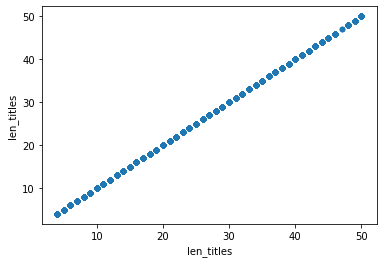

In [152]:
df.plot(x='len_titles' , y='len_titles' , kind= "scatter")